A case study using iris dataset for KNN algorithm

In [1]:
# import modules for this project
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# load iris dataset
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# training testing split
res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=12)
train_data, test_data, train_labels, test_labels = res

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

# print some interested metrics
print("Predictions from the classifier:")
learn_data_predicted = knn.predict(train_data)
print(learn_data_predicted)
print("Target values:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))

# re-do KNN using some specific parameters.
knn2 = KNeighborsClassifier(algorithm='auto',
                            leaf_size=30,
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None,
                            n_jobs=1,
                            n_neighbors=5,
                            weights='uniform')

knn.fit(train_data, train_labels)
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels)

Predictions from the classifier:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 1 2 2 1
 1 1 2 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 2 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Target values:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
0.975


0.9666666666666667

Use this command to help with choice of paramters in the `KNeighborsClassifier` function.

In [2]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(
 |      n_neighbors=5,
 |      *,
 |      weights='uniform',
 |      algorithm='auto',
 |      leaf_size=30,
 |      p=2,
 |      metric='minkowski',
 |      metric_params=None,
 |      n_jobs=None
 |  )
 |
 |  Classifier implementing the k-nearest neighbors vote.
 |
 |  Read more in the :ref:`User Guide <classification>`.
 |
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by 

Use the following code to generate an artificial dataset which contain three classes. Conduct a similar KNN analysis to the dataset and report your accuracy.

Training Accuracy (Blobs): 1.00
Test Accuracy (Blobs): 1.00


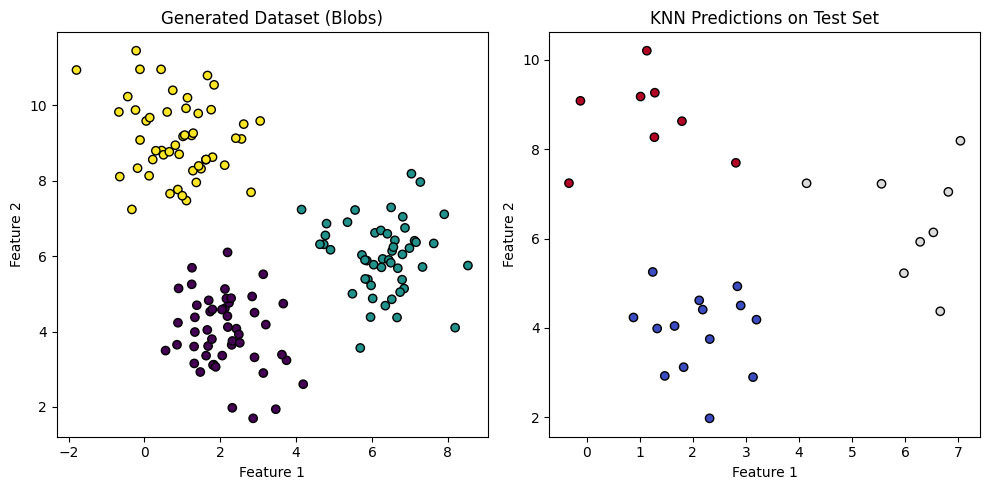

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs

# Generate synthetic dataset with three classes
centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
data_blob, labels_blob = make_blobs(n_samples=150, centers=np.array(centers), random_state=1)

# Split into training and testing sets
train_data_blob, test_data_blob, train_labels_blob, test_labels_blob = train_test_split(
    data_blob, labels_blob, train_size=0.8, test_size=0.2, random_state=12
)

# Create and fit a KNN classifier for the synthetic dataset
knn_blob = KNeighborsClassifier(n_neighbors=5)
knn_blob.fit(train_data_blob, train_labels_blob)

# Predict and evaluate on training data
train_predicted_blob = knn_blob.predict(train_data_blob)
train_accuracy_blob = accuracy_score(train_predicted_blob, train_labels_blob)
print(f"Training Accuracy (Blobs): {train_accuracy_blob:.2f}")

# Predict and evaluate on test data
test_predicted_blob = knn_blob.predict(test_data_blob)
test_accuracy_blob = accuracy_score(test_predicted_blob, test_labels_blob)
print(f"Test Accuracy (Blobs): {test_accuracy_blob:.2f}")

# Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_blob[:, 0], data_blob[:, 1], c=labels_blob, cmap='viridis', edgecolors='k')
plt.title("Generated Dataset (Blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot predictions on test data
plt.subplot(1, 2, 2)
plt.scatter(test_data_blob[:, 0], test_data_blob[:, 1], c=test_predicted_blob, cmap='coolwarm', edgecolors='k')
plt.title("KNN Predictions on Test Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()
